In [333]:
#pip3 install python-chess
# test book
#ln -s /home/work/piglab/machinelearning/game/chess/python-chess ~/jupyter/notebook/
#http://47.92.25.83:8888/notebooks/python-chess/run.ipynb

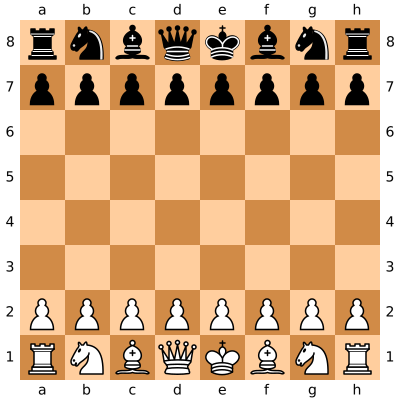

In [92]:
import chess
board = chess.Board()  #初始化棋盘
board
#print(board)

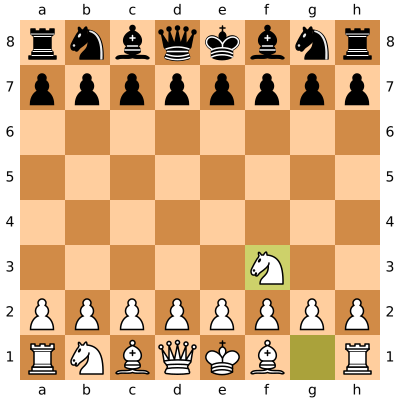

In [93]:
board.push(chess.Move.from_uci("g1f3"))  #走子
board

In [94]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R


In [235]:
 board.pop()  #悔棋
#board
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


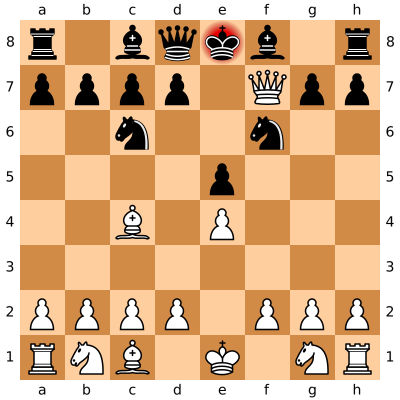

In [326]:
board = chess.Board("r1bqkb1r/pppp1Qpp/2n2n2/4p3/2B1P3/8/PPPP1PPP/RNB1K1NR b KQkq - 0 4")  #初始化棋盘
board
#print(board)

In [195]:
print(board.is_game_over())   #游戏是否结束
print(board.result())  #获取游戏结果

True
1-0


In [278]:
board.is_stalemate()  #当前player判断是否出现和棋

False

In [327]:
board.is_checkmate()  #当前player判断自己是否已被将死

True

In [323]:
print("current player: {}\n".format(board.fen().split()[1]))   #当前该哪方移动
board.was_into_check()

current player: b



False

In [246]:
board.is_attacked_by(chess.WHITE, chess.E8)  #是否被将军？？？

True

In [17]:
board.is_fivefold_repetition() #是否连续5次重复走子自动平局

False

In [19]:
board.is_seventyfive_moves()  #是否75步内没有吃子自动平局

False

In [28]:
board.is_attacked_by(chess.WHITE, chess.E8) #白方是否正在攻击黑方E8位置的王

True

In [114]:
attackers = board.attackers(chess.WHITE, chess.F3)  #白方能够攻击F3位置的棋子都有哪些
attackers
print(attackers)

for a in attackers:  #棋子位置列表
    print(a)
chess.G2 in attackers  #G2位置是否在列表中

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . 1 .
. . . 1 . . . .
3
14


True

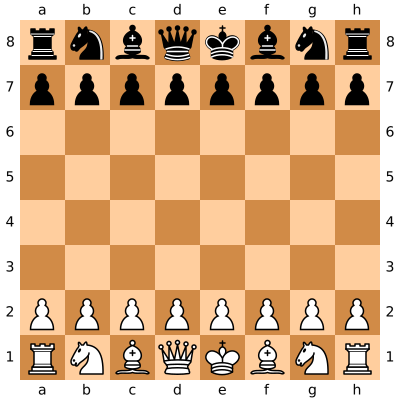

In [73]:
board = chess.Board() #初始化棋盘
board

In [199]:
board.san(chess.Move(chess.G1, chess.F3))  #move对应的标准表示格式
#board.san(chess.Move.from_uci("g1f3"))

'Ng1-f3+'

In [58]:
board.parse_san('Nf3')   #反向转换

Move.from_uci('g1f3')

In [64]:
board.variation_san([chess.Move.from_uci(m) for m in ["e2e4", "e7e5", "g1f3"]])   #连续move的标准表示格式

'1. e4 e5 2. Nf3'

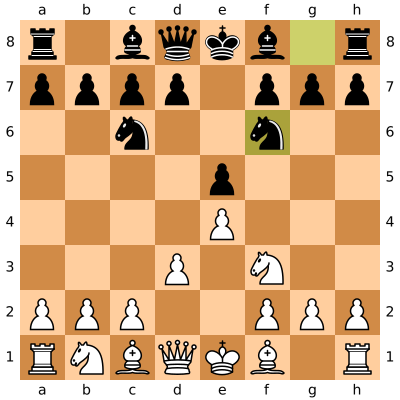

In [21]:
board = chess.Board() #初始化棋盘
[board.push(chess.Move.from_uci(m)) for m in ["e2e4", "e7e5", "g1f3", "b8c6", "d2d3", "g8f6"]]   #按棋谱执行连续move
board

In [80]:
board.fen()   #输出棋盘FEN格式盘面

'rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R b KQkq - 1 2'

In [126]:
board.peek()  #最后一步走的什么

Move.from_uci('g1f3')

In [124]:
piece = board.piece_at(chess.D1) #D1位置当前是什么棋子  
print(piece.symbol())  #棋子类型
print(piece.piece_type)  #棋子类型ID
print(piece.unicode_symbol())  #棋子符号
print(chess.Piece.from_symbol('k').unicode_symbol())  #获得指定类型棋子符号

Q
5
♕
♚


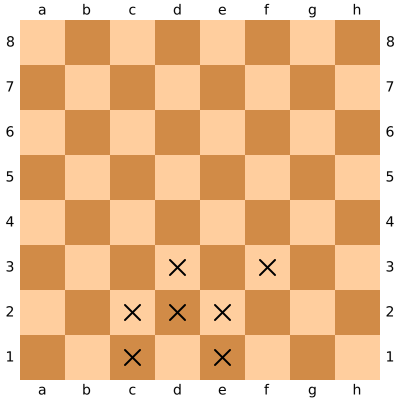

In [112]:
attacks = board.attacks(chess.D1)   #D1后可攻击位置
attacks

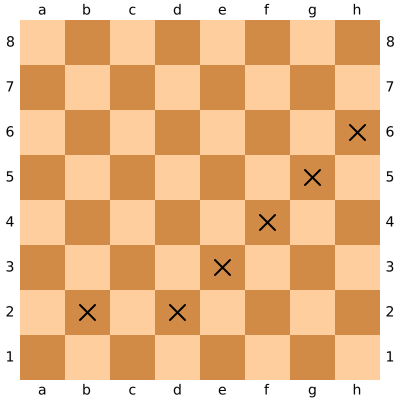

In [123]:
attacks = board.attacks(chess.C1)   #C1主教可攻击位置
attacks

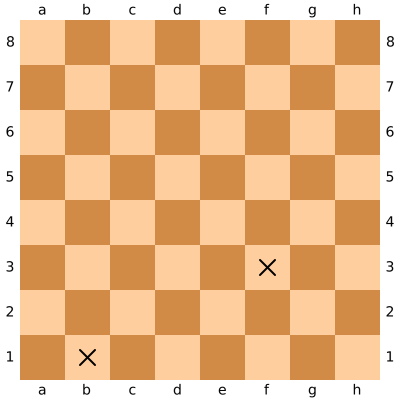

In [119]:
pieces = board.pieces(chess.KNIGHT, chess.WHITE)   #查找白方马的当前位置
pieces

In [221]:
king = board.king(chess.WHITE)   #查找白方王的位置
king

4

In [104]:
import chess.polyglot
book = chess.polyglot.open_reader("data/polyglot/performance.bin")  #使用模型？
board = chess.Board()
main_entry = book.find(board)
main_entry.move()
main_entry.move()
#book.close()

In [106]:
import chess.pgn
with open("data/pgn/molinari-bordais-1979.pgn") as pgn:   #打开棋谱
     first_game = chess.pgn.read_game(pgn)  #加载棋谱
first_game.headers["White"]   #白方姓名
first_game.headers["Black"]   #黑方姓名
first_game.headers["Result"]  #结果：黑赢

'0-1'

In [52]:
import io
pgnstr = '''[Event "国象联盟积分赛"]
[Site "26017361463646541"]
[Date "2019.02.21"]
[Round "1"]
[White "YAN"]
[Black "春儿"]
[Result "1-0"]
[WhiteId "356837"]
[BlackId "55773"]
[TimeControl "15+10"]
[Termination "白方将杀"]
[WhiteElo "1361"]
[BlackElo "1326"]
[ECO "C20"]
[Opening "王兵开局"]
[Variation "对王兵开局 帕兹尔开局"]

1. e4 e5 2. Qh5 Qf6 3. Bc4 Bc5 4. Nf3 h6 5. d3 Ne7 6. Bg5 Qg6 7. Qxg6 Nxg6 8. Bd2 d6 9. Nc3 Bg4 10. Nd5 Bb6 11. Be3 Nd7 12. Bxb6 O-O 13. Bxc7 Bxf3 14. gxf3 Rac8 15. Rg1 Nf4 16. Ne7 Kh8 17. Nxc8 Rxc8 18. Bxd6 f6 19. Rg4 a6 20. O-O-O b5 21. Bb3 a5 22. d4 a4 23. Bf7 Nh3 24. Rg2 Nf4 25. Rg4 Ne2 26. Kb1 Nxd4 27. c3 Nxf3 28. Be6 Rd8 29. Bc5 Nxh2 30. Rg2 Nf3 31. Rxd7 Re8 32. Bf5 Nh4 33. Rgxg7 Nxf5 34. exf5 e4 35. Rh7 Kg8 36. Rdg7# 1-0 '''

import chess.pgn
first_game = chess.pgn.read_game(io.StringIO(pgnstr))
print(first_game.headers["White"])   #白方姓名
print(first_game.headers["Black"])   #黑方姓名
print(first_game.headchesseaseers["Result"])  #结果：黑赢
print(first_game)

YAN
春儿
1-0
[Event "国象联盟积分赛"]
[Site "26017361463646541"]
[Date "2019.02.21"]
[Round "1"]
[White "YAN"]
[Black "春儿"]
[Result "1-0"]
[BlackElo "1326"]
[BlackId "55773"]
[ECO "C20"]
[Opening "王兵开局"]
[Termination "白方将杀"]
[TimeControl "15+10"]
[Variation "对王兵开局 帕兹尔开局"]
[WhiteElo "1361"]
[WhiteId "356837"]

1. e4 e5 2. Qh5 Qf6 3. Bc4 Bc5 4. Nf3 h6 5. d3 Ne7 6. Bg5 Qg6 7. Qxg6 Nxg6 8. Bd2 d6 9. Nc3 Bg4 10. Nd5 Bb6 11. Be3 Nd7 12. Bxb6 O-O 13. Bxc7 Bxf3 14. gxf3 Rac8 15. Rg1 Nf4 16. Ne7+ Kh8 17. Nxc8 Rxc8 18. Bxd6 f6 19. Rg4 a6 20. O-O-O b5 21. Bb3 a5 22. d4 a4 23. Bf7 Nh3 24. Rg2 Nf4 25. Rg4 Ne2+ 26. Kb1 Nxd4 27. c3 Nxf3 28. Be6 Rd8 29. Bc5 Nxh2 30. Rg2 Nf3 31. Rxd7 Re8 32. Bf5 Nh4 33. Rgxg7 Nxf5 34. exf5 e4 35. Rh7+ Kg8 36. Rdg7# 1-0


In [167]:
dir(board)  #board的所有函数
print()

e1g1
O


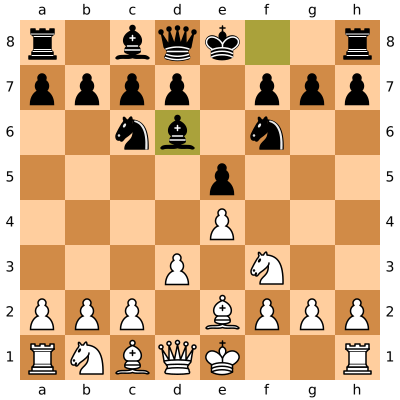

In [33]:
import chess
board = chess.Board() #初始化棋盘
[board.push(chess.Move.from_uci(m)) for m in ["e2e4", "e7e5", "g1f3", "b8c6", "d2d3", "g8f6","f1e2","f8d6"]]   #按棋谱执行连续move

print(board.parse_san("O-O"))
print("O-O"[0:1])
board

In [38]:
board.fen()   #输出棋盘FEN格式盘面

'r1bqk2r/pppp1ppp/2nb1n2/4p3/4P3/3P1N2/PPP1BPPP/RNBQK2R w KQkq - 3 5'

In [39]:
board.san(chess.Move.from_uci('e1g1'))  #move转san

'O-O'

In [7]:
board.is_valid()   #棋盘是否有效

True

In [20]:
print("current player: {}\n".format(board.fen().split()[1]))   #当前该哪方移动

print("can legal move count: {}\n".format(board.legal_moves.count()))  #有多少合法移动位置

for move in board.generate_legal_moves():   #所有可合法移动action list(包含王车移位、将军、吃子等)
    m = str(move)
    # action=move对应的数字表示
    from_idx = (int(m[1:2])-1)*8 + (ord(m[0:1])-ord('a'))
    to_idx = (int(m[3:4])-1)*8 + (ord(m[2:3])-ord('a'))
    action = from_idx*64+to_idx
    #print(from_idx,to_idx,action)
    # mback=action代码解码回move
    from_idx = action//64
    to_idx = action%64
    mback = chr(from_idx%8+ord('a')) + str(from_idx//8+1) + chr(to_idx%8+ord('a')) + str(to_idx//8+1)
    print(str(move) +'\t' + board.san(move)  +'\t' + str(from_idx)  +'\t' + str(to_idx)  +'\t' + str(action)  +'\t' + mback )


current player: w

can legal move count: 32

f3g5	Ng5	21	38	1382	f3g5
f3e5	Nxe5	21	36	1380	f3e5
f3h4	Nh4	21	31	1375	f3h4
f3d4	Nd4	21	27	1371	f3d4
f3d2	Nfd2	21	11	1355	f3d2
f3g1	Ng1	21	6	1350	f3g1
e2f1	Bf1	12	5	773	e2f1
h1g1	Rg1	7	6	454	h1g1
h1f1	Rf1	7	5	453	h1f1
e1d2	Kd2	4	11	267	e1d2
e1f1	Kf1	4	5	261	e1f1
d1d2	Qd2	3	11	203	d1d2
c1h6	Bh6	2	47	175	c1h6
c1g5	Bg5	2	38	166	c1g5
c1f4	Bf4	2	29	157	c1f4
c1e3	Be3	2	20	148	c1e3
c1d2	Bd2	2	11	139	c1d2
b1c3	Nc3	1	18	82	b1c3
b1a3	Na3	1	16	80	b1a3
b1d2	Nbd2	1	11	75	b1d2
e1g1	O-O	4	6	262	e1g1
d3d4	d4	19	27	1243	d3d4
h2h3	h3	15	23	983	h2h3
g2g3	g3	14	22	918	g2g3
c2c3	c3	10	18	658	c2c3
b2b3	b3	9	17	593	b2b3
a2a3	a3	8	16	528	a2a3
h2h4	h4	15	31	991	h2h4
g2g4	g4	14	30	926	g2g4
c2c4	c4	10	26	666	c2c4
b2b4	b4	9	25	601	b2b4
a2a4	a4	8	24	536	a2a4


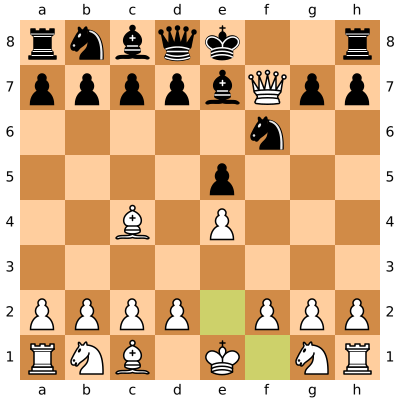

In [32]:
board2 = board.copy()  #棋盘复制
board2.push(chess.Move.from_uci('f1e2'))
board2

In [262]:
print(board2.has_castling_rights(chess.WHITE))   #白方是否可王车移位（这里看起来是读的fen）
print(board2.has_kingside_castling_rights(chess.WHITE))   #是否可王侧移位
print(board2.has_queenside_castling_rights(chess.WHITE))  #是否可后侧移位

True
True
True


In [212]:
board2.fen().split()[1]   #当前该哪方移动

'b'

current player: b

can legal move count: 0



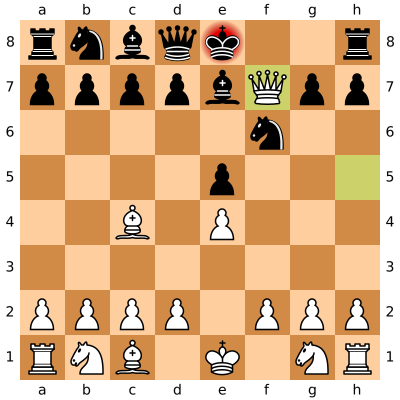

In [41]:
board2.pop()  #push(chess.Move.from_uci('f8c5'))
board2

In [200]:
print("current player: {}\n".format(board2.fen().split()[1]))   #当前该哪方移动

print("can legal move count: {}\n".format(board2.legal_moves.count()))  #有多少合法移动位置

for move in board2.generate_legal_moves():   #所有可合法移动action list(包含王车移位、将军、吃子等)
    san = board2.san(move)
    print(str(move) +'\t' + san +'\t' + ord(san))


current player: b

can legal move count: 0



True
[Event "AI Game"]
[Site "Beijing, China"]
[Date "2019.01.11"]
[Round "1"]
[White "AI"]
[Black "YJY"]
[Result "1-0"]

1. e4 e5 2. Qh5 Be7 3. Bc4 Nf6 4. Qxf7# 1-0
1-0
e4
e5
Qh5
Be7
Bc4
Nf6
Qxf7#
1-0
['e4', 'e5', 'Qh5', 'Be7', 'Bc4', 'Nf6', 'Qxf7#', '1-0']


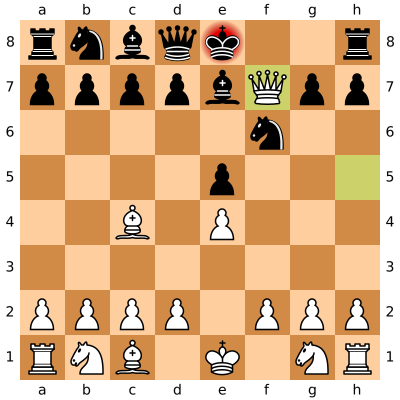

In [194]:
import chess.pgn
import chess
book = chess.pgn.Game() #创建pgn棋谱
board = chess.Board()   #创建棋盘
book.headers["Event"] = "AI Game"
book.headers["Site"] = "Beijing, China"
book.headers["Date"] = "2019.01.11"
book.headers["Round"] = "1"
book.headers["White"] = "AI"
book.headers["Black"] = "YJY"
book.headers["Result"] = "*" #游戏进行中
node = book
for m in ["e2e4", "e7e5", "d1h5", "f8e7", "f1c4", "g8f6", "h5f7"]:   #按棋谱执行连续move
    move = chess.Move.from_uci(m)
    board.push(move)  #棋盘走子
    node = node.add_variation(move)  #记录move到棋谱

game_over = board.is_game_over()   #游戏是否结束
if game_over and board.is_checkmate(): #当前player判断自己是否已被将死
    if board.fen().split()[1] == 'w':
        book.headers["Result"] = "0-1" #黑胜
    else:
        book.headers["Result"] = "1-0" #白胜
elif game_over and board.is_stalemate(): #当前player判断已和棋
    book.headers["Result"] = "1/2-1/2" #和棋
        
print(board.is_checkmate() )
print(book)  #打印pgn棋谱
print(book.headers.get("Result", "?"))
#棋谱转list
variations = []
tmp = str(book).split('\n')[-1:][0].split(' ')
for i in range(len(tmp)):
    if i%3 == 0:
        continue
    print(tmp[i])
    variations.append(tmp[i])
print(variations)


board  #打印棋盘


In [40]:
board.fen().split()[0]

'r1bqk2r/pppp1ppp/2nb1n2/4p3/4P3/3P1N2/PPP1BPPP/RNBQK2R'

In [24]:
board.fen().split()[0].split('/')

['rnbqk2r', 'ppppbQpp', '5n2', '4p3', '2B1P3', '8', 'PPPP1PPP', 'RNB1K1NR']

In [95]:
#盘面信息的二维数组
state=str(board)
print(state)
state = state.split('\n')
for i in range(len(state)):
    state[i] = state[i].split(' ')
state

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R


[['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'],
 ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', 'N', '.', '.'],
 ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
 ['R', 'N', 'B', 'Q', 'K', 'B', '.', 'R']]

In [106]:
state = {}
s = str(board)
# print(s)
s = s.split('\n')
for i in range(len(s)):
    sl = s[len(s)-i-1].split(' ')
    for j in range(len(sl)):
        state[i*8+j] = sl[j]
        #print(i*8+j,sl[j])
state

{0: 'R',
 1: 'N',
 2: 'B',
 3: 'Q',
 4: 'K',
 5: 'B',
 6: '.',
 7: 'R',
 8: 'P',
 9: 'P',
 10: 'P',
 11: 'P',
 12: 'P',
 13: 'P',
 14: 'P',
 15: 'P',
 16: '.',
 17: '.',
 18: '.',
 19: '.',
 20: '.',
 21: 'N',
 22: '.',
 23: '.',
 24: '.',
 25: '.',
 26: '.',
 27: '.',
 28: '.',
 29: '.',
 30: '.',
 31: '.',
 32: '.',
 33: '.',
 34: '.',
 35: '.',
 36: '.',
 37: '.',
 38: '.',
 39: '.',
 40: '.',
 41: '.',
 42: '.',
 43: '.',
 44: '.',
 45: '.',
 46: '.',
 47: '.',
 48: 'p',
 49: 'p',
 50: 'p',
 51: 'p',
 52: 'p',
 53: 'p',
 54: 'p',
 55: 'p',
 56: 'r',
 57: 'n',
 58: 'b',
 59: 'q',
 60: 'k',
 61: 'b',
 62: 'n',
 63: 'r'}